This notebook is an attempt towards putting together the relevant information related to **Linear regression in Python**. Python mainly uses **Scikit-learn** package for any kind of machine learning algorithm. Another package which is sometimes used is **statsmodel**. This notebook has couple of examples using statsmodel but they are completely optional and only for reference for those who want to look at something extra. For anyone coming with prior R experience, statsmodel generates outputs similar to R outputs.

## Importing required packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

#import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.api import add_constant

F:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load the data

In [ ]:
pd.read_csv()

In [3]:
boston = load_boston()

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

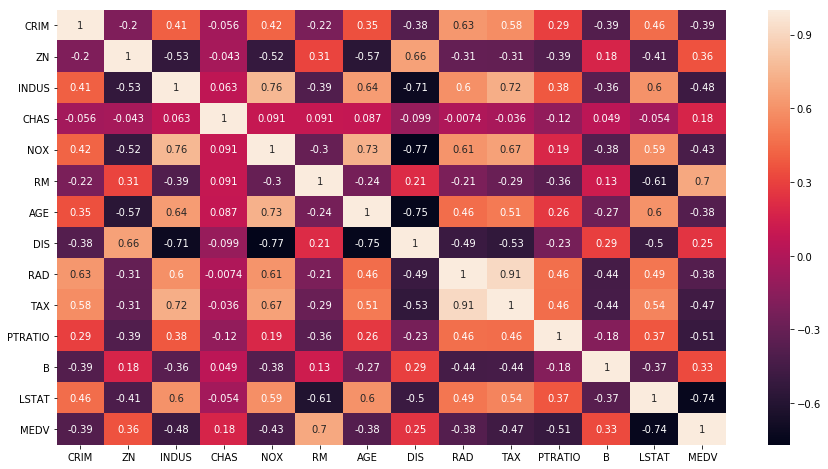

In [6]:
plt.figure(figsize=(15,8))

corr1 = boston_df.corr()
sns.heatmap(corr1,annot = True)

In [7]:
boston_df['CHAS'].unique()

array([0., 1.])

## Regression Model 1 - Simple linear regression

In [6]:
x = boston_df[['RM']]
y = boston_df.MEDV

In [21]:
x.dtypes,y.dtype

(RM    float64
 dtype: object, dtype('float64'))

In [8]:
# Use only one feature RM - Average no of rooms
#Simple linear regression
x = boston_df[['RM']]
y = boston_df.MEDV
#y = boston_df[['MEDV']]

lm1 = LinearRegression()
lm1.fit(x, y) # fit the model
print("Coefficient:", lm1.coef_,"Intercept:", lm1.intercept_)

Coefficient: [9.10210898] Intercept: -34.670620776438554


In [9]:
predicted_1 = lm1.predict(x) # Predict prices
print("Predicted values: ", predicted_1[:4])
print("Actual values:\n", boston_df[['RM','MEDV']][:4])

Predicted values:  [25.17574577 23.77402099 30.72803225 29.02593787]
Actual values:
       RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4


In [10]:
print("Mean squared error for Simple Linear Model: %.2f" % mean_squared_error(y, predicted_1))
print('R2 score for Simple Linear Model: %.2f' % r2_score(y, predicted_1))
print("Root Mean squared error for Simple Linear Model: %.2f" % np.sqrt(mean_squared_error(y, predicted_1)))
# print("Mean squared error for Multiple Linear Model: %.2f" % mean_squared_error(y, predicted_2))

# print('R2 score for Multiple Linear Model: %.2f' % r2_score(y, predicted_2))

Mean squared error for Simple Linear Model: 43.60
R2 score for Simple Linear Model: 0.48
Root Mean squared error for Simple Linear Model: 6.60


## Regression Model 2  - Multiple linear regression

In [11]:
# Using more than 1 variable
x = boston_df[['RM','AGE']]
y = boston_df.MEDV

from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(x, y) # fit the model
#print("Coefficient:", lm2.coef_,"Intercept:", slm1.intercept_)
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lm2.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,RM,8.401581
1,AGE,-0.072777


In [12]:
predicted_1 = lm2.predict(x) # Predict prices
print("Predicted values: ", predicted_1[:4])
print("Actual values:\n", boston_df[['RM','AGE','MEDV']][:4])

Predicted values:  [25.21795106 22.92706559 30.64130043 30.18368957]
Actual values:
       RM   AGE  MEDV
0  6.575  65.2  24.0
1  6.421  78.9  21.6
2  7.185  61.1  34.7
3  6.998  45.8  33.4


In [13]:
print("Mean squared error for Multiple Linear Model: %.2f" % mean_squared_error(y, predicted_1))
print("Root Mean squared error for Multiple Linear Model: %.2f" % np.sqrt(mean_squared_error(y, predicted_1)))
print('R2 score for Multiple Linear Model: %.2f' % r2_score(y, predicted_1))

Mean squared error for Multiple Linear Model: 39.65
Root Mean squared error for Multiple Linear Model: 6.30
R2 score for Multiple Linear Model: 0.53


## Regression model 3 - Multiple linear regression with all variables

In [14]:
X = boston_df.drop('MEDV',axis = 1)
Y = boston_df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [15]:
lm1 = LinearRegression()
lm1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#print(list(zip(X.columns,lm1.coef_)))

In [17]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lm1.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,CRIM,-0.130800
1,ZN,0.049403
2,INDUS,0.001095
3,CHAS,2.705366
4,NOX,-15.957050
5,RM,3.413973
6,AGE,0.001119
7,DIS,-1.493081
8,RAD,0.364422
9,TAX,-0.013172


In [18]:
predicted_train = lm1.predict(X_train)
predicted_test = lm1.predict(X_test)

print("Mean squared error for training data: %.2f" % mean_squared_error(Y_train, predicted_train))
print('R2 score for training data: %.2f' % r2_score(Y_train, predicted_train))

print("Mean squared error for test data: %.2f" % mean_squared_error(Y_test, predicted_test))
print('R2 score for Multiple test data: %.2f' % r2_score(Y_test, predicted_test))

Mean squared error for training data: 22.48
R2 score for training data: 0.74
Mean squared error for test data: 20.87
R2 score for Multiple test data: 0.73


## (Optional)Regression model 4 - statsmodels

Another package in python which can be used to perform linear regression. This one would look familiar to R linear regression output and displays a lot of information. We should be fine if we understand how to run linear regression using sklearn but this might be good for anyone coming with R background.

In [19]:
X = boston_df[['CRIM']]
Y = boston_df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#adding an intercept variable, without this we would be forcing our model eqn to go through origin
X_train = add_constant(X_train) # adding a constant

model = sm.OLS(Y_train, X_train).fit()   # order is first y and then x
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

(404, 1)
(102, 1)
(404,)
(102,)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     71.67
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           4.81e-16
Time:                        18:03:28   Log-Likelihood:                -1439.7
No. Observations:                 404   AIC:                             2883.
Df Residuals:                     402   BIC:                             2891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.122

## Regression output explained

### Regression errors

SST or total sum squared errors if we just use the mean value of y as our estimated value
also called total sum of squares
SST <- sum((medv - mean(medv))^2)

SSR or sum squared regression shows how much the error value is improved if we use regression instead of just average value
also called residual sum of squares
SSR <- sum((predict(model) - mean(medv))^2)

SSE or sum squared of errors represents the error when we use regression for predicted values
also called explained sum of squares
SSE <- sum((medv - predict(model))^2)

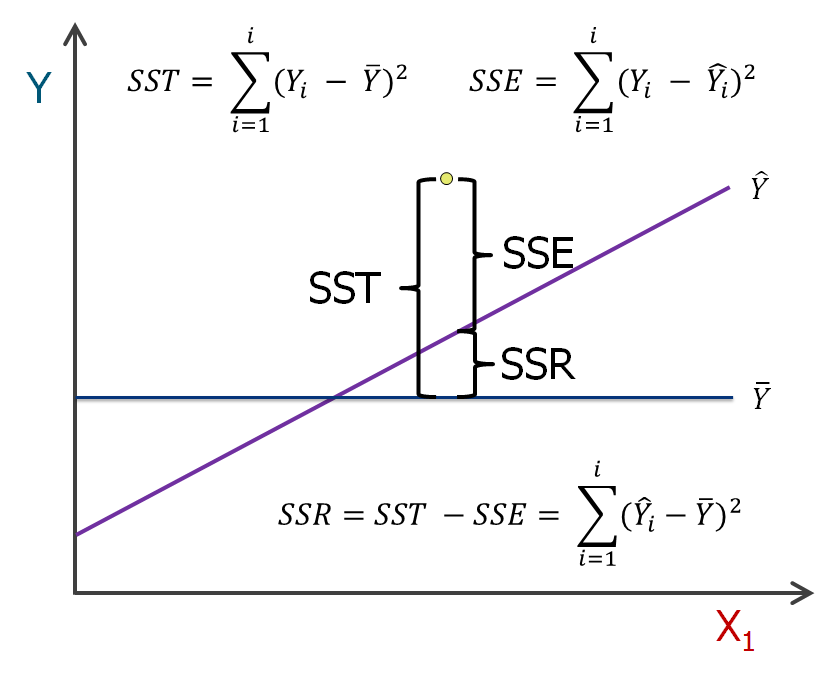

### Other interpretation

**R-squared value**

$R^{2}$ shows the percentage improvement in error when we use regression instead of average value. It represents the error proportion explained by regression out of the total error value. It is a measure of how well does the model fit the data. In our example, r squared has a value of 0.15 or this model explains 15% of the variance in price variable based on the crime variable.
One problem with r squared is that this value always keeps increasing as we keep adding variables, which might always not be right.
This is where adjusted $R^{2}$ comes into picture and is preferred over R squared values. Its value will always be less than or equal to R squared value.
Its defined as 1 - ((1 - $R^{2}$) * (n - 1)/(n - k - 1))
where n is the sample size and k is the number of variables in the model.
In our case, n = 404 and k = 1, thus adjusted $R^{2}$ -
1 - ((1 - .1508) * (404 - 1)/(404 - 1 - 1))    

$R^{2}$ = SSR/SST     

Higher the value, better is the model.

**coefficients**

These represent the individual coefficients for each variable.
The first one is the intercept value which represents the average price of houses in the given data or the price of the house 
when all other x-variables are zero.
The coefficient for the crime variable has a value of -0.415. The negative sign indicates that if the value of this crime
variable increases, the price would decrease.Also, if the crime rate value increase by 1 unit, the price of the house goes down
by .41 USD 1000s or 410 dollars. All these changes are made with an assumption that all other variables are held constant.

**std err**
This value represents the average amount that the coefficient estimates might vary from the actual average value of our response
variable.
In simple words, if we rerun the model again and again, how much can the values differ with each run. In our example, we 
can interpret that the price can vary by .04 USD 1000s on an average. We would like to have this value as small as possible relative to the coefficients.
This can also be interpreted as confidence intervals for the coefficient value - (coefficient value +- 2 * std error)

**t value**

This is a measure of how many standard deviations is the coefficient estimate away from zero. If the value is large, 
that would indicate a strong relationship with the y variable.

**p-value(P>|t|)**

p-value indicates a probability that the given result occurred just by chance. If the p-value is low, we can safely reject
the null hypothesis, which in this case states that no variables in this model can explain the variance in y-variable or a specific variable is not related to the y-variable.
In our case, the p-value is much below the significance level of 5%, so we can reject the null-hypothesis and 
be sure that the model is actually useful or the variable has an impact on the y-variable. 

**Degrees of freedom**

The simplest definition could be the number of data points that were used for making this estimation.
In our data, we have 404 observations and 2 degrees of freedom are taken away because of the coefficients for intercepts and crim variable.     
Similarly, residual df is defined as n - (k + 1) where k is the number of parameters to be estimated and (k+1) because of the constant term.

**F-statistic**

Explains the overall goodness of the model as compared to a null model. Higher the value than 1, better it is. 
If we have a large number of variables, an F-statictic value slightly greater than 1 might be ok as well but with lesser
number of variables, we need a significantly higher number to make this inference. F-statistic always has two degrees of freedom.

**AIC and BIC**

Akaike Information criteria and Bayesian information criteria

These are methods used to select the best models out of multiple models. Lower the value, better is the model.


## (Optional)Regression model 5 - categorical variable

In [20]:
# boston_df_chas['CHAS'] = boston_df["CHAS"].astype('str')

boston_df['CHAS_ord'] = pd.Categorical(boston_df['CHAS']).codes
# X = boston_df[['CRIM_ord']]
# Y = boston_df['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(boston_df, boston_df['MEDV'], test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#adding an intercept variable, without this we would be forcing our model eqn to go through origin
X_train = add_constant(X_train) # adding a constant

model = sm.ols(formula="MEDV ~ C(CHAS)", data=X_train).fit()


#model = sm.OLS(Y_train, X_train).fit()   # order is first y and then x
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

(404, 15)
(102, 15)
(404,)
(102,)
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.00
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           0.000995
Time:                        18:03:28   Log-Likelihood:                -1467.3
No. Observations:                 404   AIC:                             2939.
Df Residuals:                     402   BIC:                             2947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept 

Looking at the coefficients, this is how we interpret them. WHEN CHAS = 0, the coeff for the CHAS column is 22.23 while when CHAS = 1. then the coeff is (22.23 + 5.95) i.e. the coeff is now measured relative to one of the classes.

## Manual calculations of regression coefficients 

1. Calculate average of your X variable.
2. Calculate the difference between each X and the average X.
3. Square the differences and add it all up.  This is SSxx.
4. Calculate average of your Y variable.
5. Multiply the differences (of X and Y from their respective averages) and add them all together.  This is SSxy.
6. Using SSxx and SSxy, you calculate the intercept by subtracting SSxx / SSxy * AVG(X) from AVG(Y).

In [22]:
df['x_av'] = df['CRIM'].mean()
x_av = df['CRIM'].mean()
df['x_diff'] = df['CRIM'] - df['x_av']
ss_xx = sum(df['x_diff']**2) 
df['y_av'] = df['MEDV'].mean()
y_av = df['MEDV'].mean() 
df['y_diff'] = df['MEDV'] - df['y_av']
ss_xy = sum(df['x_diff'] * df['y_diff'])
df.head()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,MEDV,CRIM,x_av,x_diff,y_av,y_diff
0,24.0,0.00632,3.613524,-3.607204,22.532806,1.467194
1,21.6,0.02731,3.613524,-3.586214,22.532806,-0.932806
2,34.7,0.02729,3.613524,-3.586234,22.532806,12.167194
3,33.4,0.03237,3.613524,-3.581154,22.532806,10.867194
4,36.2,0.06905,3.613524,-3.544474,22.532806,13.667194


In [23]:
x_coeff = ss_xy/ss_xx
x_coeff

-0.4151902779150907

In [24]:
intercept = y_av - (x_coeff * x_av)
intercept

24.0331061741239

In [ ]:
## Create dummy columns for all string variables in one go


# for column in df.columns:
#     if df[column].dtype==object:
#         dummycols=pd.get_dummies(df[column])
#         df=df.join(dummycols)
#         del inputData[column]